In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Upload 'pic3.png' file manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the image.

In [3]:
img = cv2.imread("pic3.png")

In [4]:
def resize_nn(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################

    import math
    out_img = np.zeros((int(img.shape[0]*k), int(img.shape[1]*k), img.shape[2]), dtype=np.uint8)
    for i in range(out_img.shape[0]):
      for j in range(out_img.shape[1]):
        x_l = math.floor(j/k) 
        y_l = math.floor(i/k)
        x_h = math.ceil(j/k)
        y_h = math.ceil(i/k)
        distx = j/k - x_l
        disty = i/k - y_l
        a = distx**2 + disty**2
        b = (1-distx)**2 + disty**2
        c = (1-distx)**2 + (1-disty)**2
        d = distx**2 + (1-disty)**2
        if a < b and a < c and a < d:
            out_img[i,j] = img[y_l, x_l]
        if b < a and b < c and b < d:
            out_img[i,j] = img[y_l, x_h]
        if c < b and c < a and c < d:
            out_img[i,j] = img[y_h, x_h]
        if d < b and d < c and d < a:
            out_img[i,j] = img[y_h, x_l]
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [5]:
def resize_bilinear(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    import math
    out_img = np.zeros((int(img.shape[0]*k), int(img.shape[1]*k), img.shape[2]), dtype=np.uint8)
    for i in range(out_img.shape[0]):
      for j in range(out_img.shape[1]):
        x_l = math.floor(j/k) 
        y_l = math.floor(i/k)
        x_h = math.ceil(j/k)
        y_h = math.ceil(i/k)
        distx = j/k - x_l
        disty = i/k - y_l
        a = img[y_l, x_l] if x_l >= 0 and y_l >= 0 else 0
        b = img[y_l, x_h] if x_h < img.shape[1] and x_l >= 0 else 0
        c = img[y_h, x_l] if x_l >= 0 and y_h < img.shape[0] else 0
        d = img[y_h, x_h] if x_h < img.shape[1] and y_h < img.shape[0] else 0
        out_img[i,j] = a*(1-distx)*(1-disty) + b*distx*(1-disty) + c*disty*(1-distx) + d*distx*disty

    #############################
    # End your code here ########
    #############################    
    
    return out_img

# Checking the output:

Resize the image by utilizing output1 and output2 in the code block below and plot the original and resized images side by side in both cases.


Text(0.5, 1.0, 'Bilinear Interpolation to k=0.4')

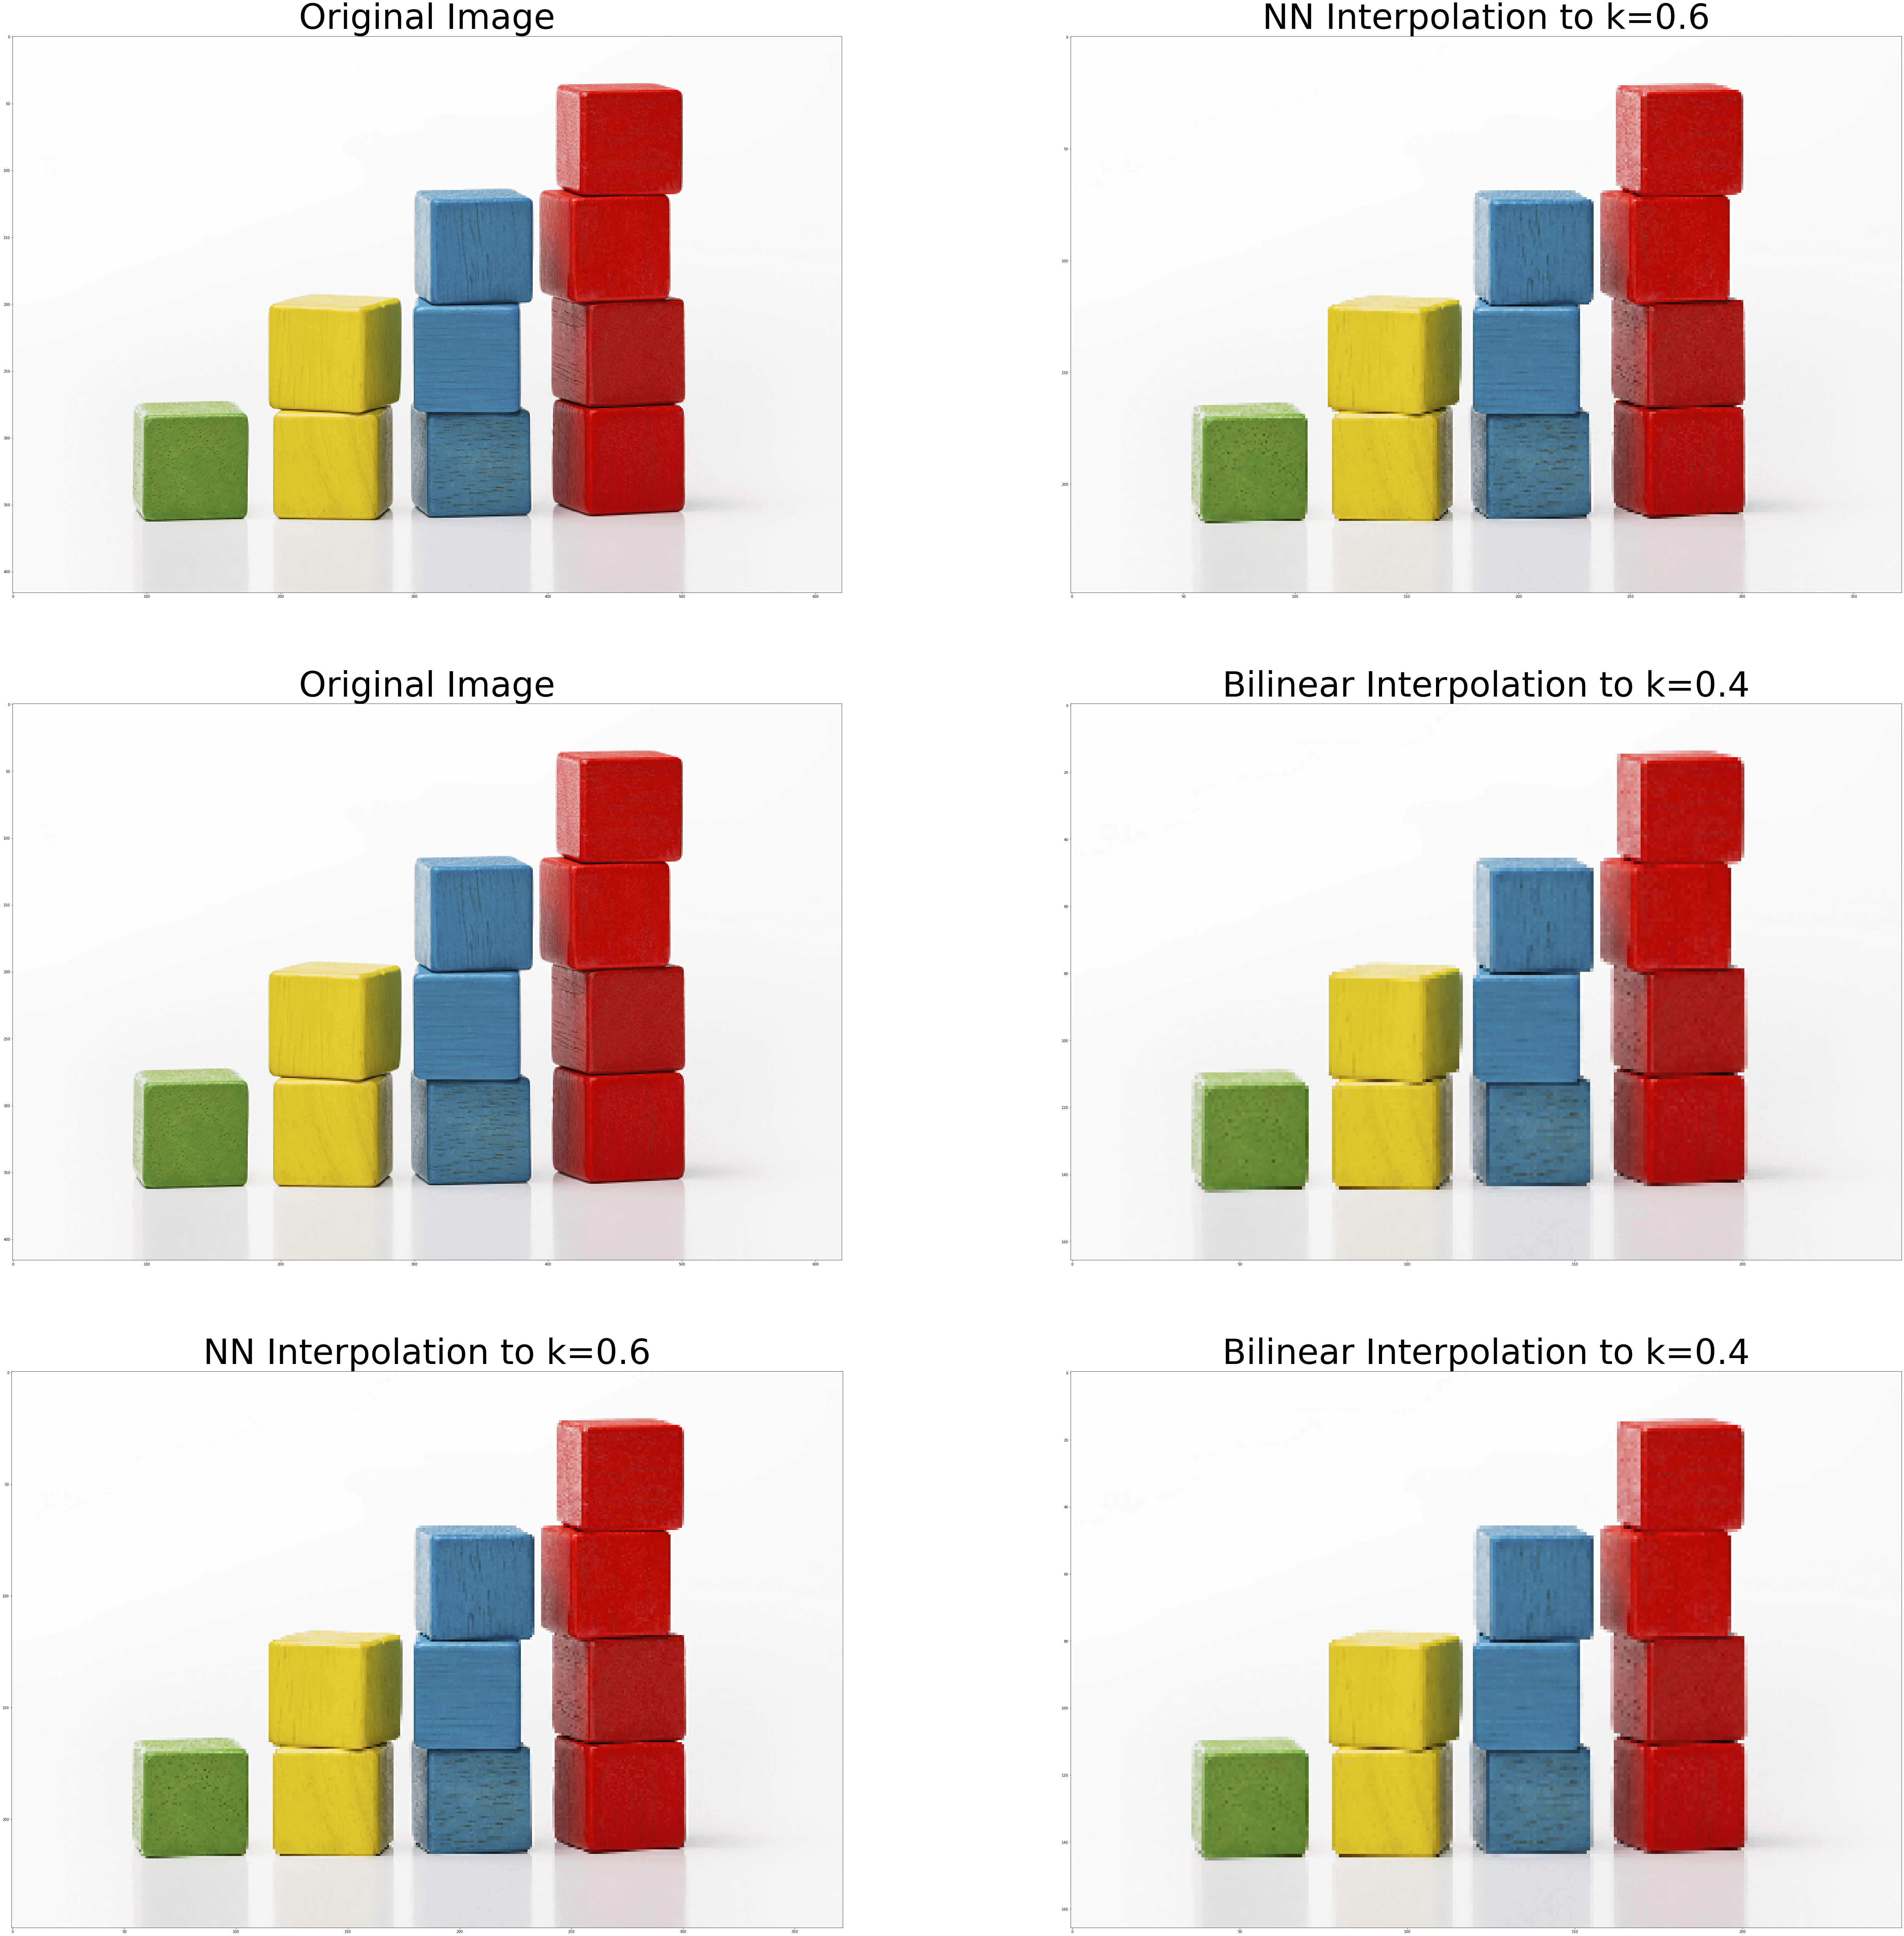

In [6]:
output1 = resize_nn(img, k=0.6)

output2 = resize_bilinear(img, k=0.4) 

#############################
# Start your code from here #
#############################

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 100 , 100
rcParams["axes.titlesize"] = 100

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
ax1.imshow(img[:,:,[2,1,0]])
ax1.set_title("Original Image")
ax2.imshow(output1[:,:,[2,1,0]])
ax2.set_title("NN Interpolation to k=0.6")
ax3.imshow(img[:,:,[2,1,0]])
ax3.set_title("Original Image")
ax4.imshow(output2[:,:,[2,1,0]])
ax4.set_title("Bilinear Interpolation to k=0.4")
ax5.imshow(output1[:,:,[2,1,0]])
ax5.set_title("NN Interpolation to k=0.6")
ax6.imshow(output2[:,:,[2,1,0]])
ax6.set_title("Bilinear Interpolation to k=0.4")

#############################
# End your code here ########
#############################

In [7]:
your_observation = """
1. Nearest Neighbour Interpolation preserves sharp details (edges of blocks).
2. Nearest Neighbour Interpolation introduces jaggedness in previously smooth areas (faces of blocks).
3. Bilinear Interpolation reduces sharpness of edges and causes more smudge as compared to Nearest Neighbour Interpolation (faces of blocks, specially those not facing the camera).
4. Bilinear Interpolation is slower as compared to Nearest Neighbour
5. For this particular use-case, Nearest Neighbour Interpolation seems to be better than Bilinear Interpolation.
"""

print(your_observation)


1. Nearest Neighbour Interpolation preserves sharp details (edges of blocks).
2. Nearest Neighbour Interpolation introduces jaggedness in previously smooth areas (faces of blocks).
3. Bilinear Interpolation reduces sharpness of edges and causes more smudge as compared to Nearest Neighbour Interpolation (faces of blocks, specially those not facing the camera).
4. Bilinear Interpolation is slower as compared to Nearest Neighbour
5. For this particular use-case, Nearest Neighbour Interpolation seems to be better than Bilinear Interpolation.

